In [1]:
import numpy as np
import a2_utils
import cv2
import matplotlib.pyplot as plt
import math
from PIL import Image
import os

# Exercise 1: Convolution

a)

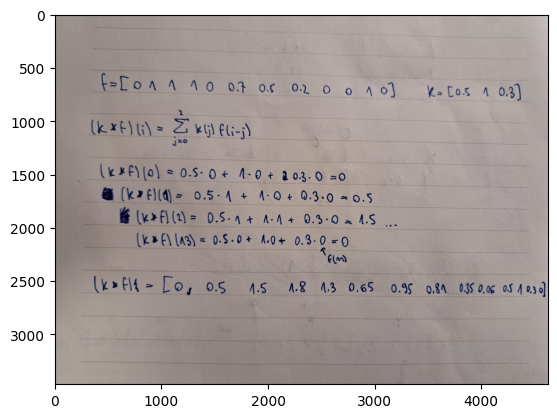

In [2]:
drawing1 = Image.open("./drawings/20231111_215424.jpg")
plt.imshow(drawing1)

b)

In [3]:
def simple_convolution(I, k):
    N = len(k) // 2
    res = []

    for i in range(N, len(I) - N):
        s = 0
        for j in range(len(k)):
            s += k[j]*I[i-j]
        res.append(s)
    return np.array(res)

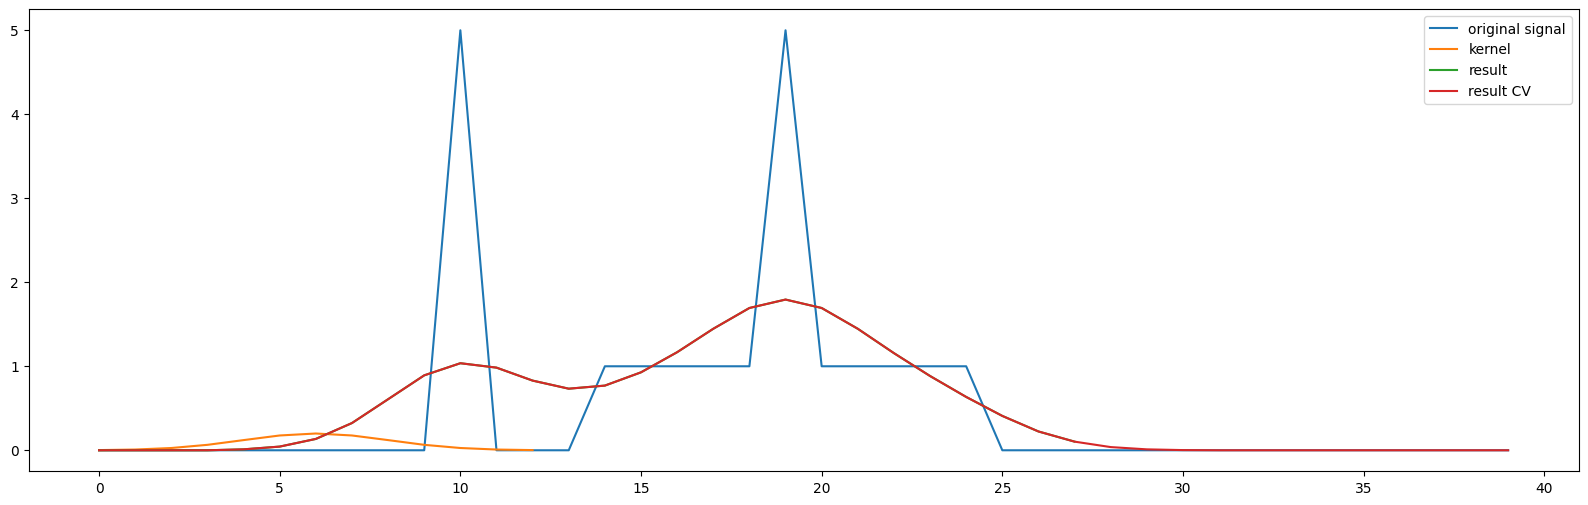

In [4]:
I = a2_utils.read_data("signal.txt")
k = a2_utils.read_data("kernel.txt")

res = simple_convolution(I, k)
res_cv = cv2.filter2D(I, -1, k)

plt.figure(figsize=(20,6))
plt.plot(I, label='original signal')
plt.plot(k, label='kernel')
plt.plot(res, label='result')
plt.plot(res_cv, label='result CV')
plt.legend()

In [5]:
k.sum()

0.9999999974

A: The kernel is simmilar to Gaussian kernel - the sum of all elements is 1 - the integral of probability density funcion

In [6]:
def simple_convolution_imp(I, k):
    N = len(k) // 2
    res = []

    for i in range(len(I)):
        s = 0
        for j in range(len(k)):
            if i - j + N < 0 or i - j + N >= len(I):
                continue
            s += k[j]*I[i-j+N]
        res.append(s)
    return np.array(res)

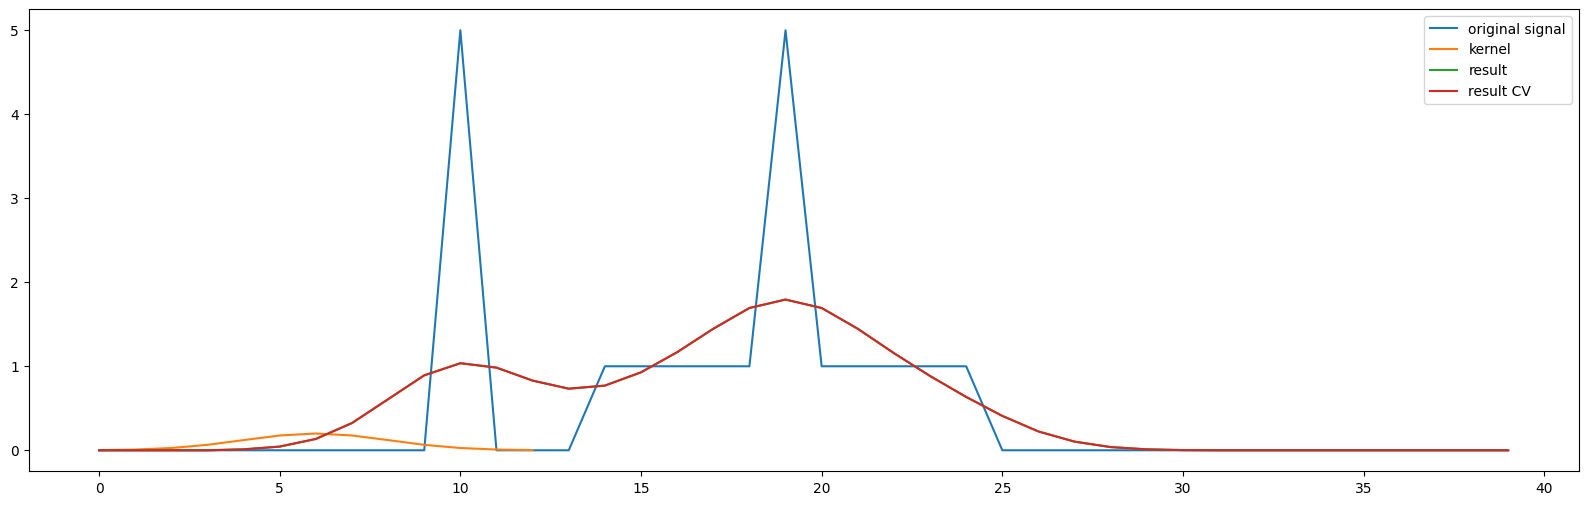

In [7]:
res_2 = simple_convolution_imp(I, k)

plt.figure(figsize=(20,6))
plt.plot(I, label='original signal')
plt.plot(k, label='kernel')
plt.plot(res_2, label='result')
plt.plot(res_cv, label='result CV')
plt.legend()

In [8]:
def gauss(sigma):
    size = 2*math.ceil(3*sigma) + 1
    x = np.linspace(-3*sigma-.5, 3*sigma+.5, size)
    g = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x**2)/(2*sigma**2))
    g /= g.sum()
    return g, x

d)

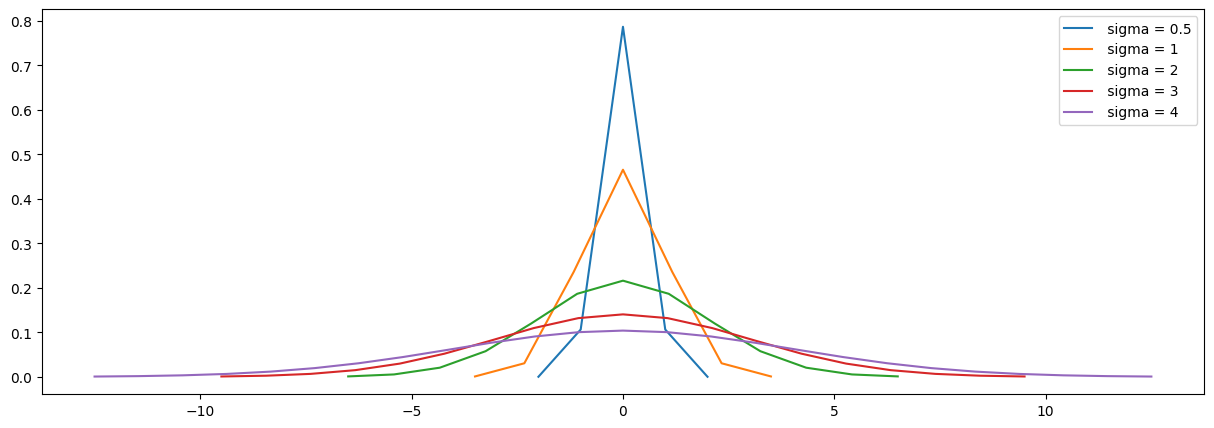

In [9]:
plt.figure(figsize=(15,5))
for sigma in [0.5, 1, 2, 3, 4]:
	g, x = gauss(sigma)
	plt.plot(x, g, label=f" sigma = {sigma}")

plt.legend()

A: Convolution of two signals is shown below

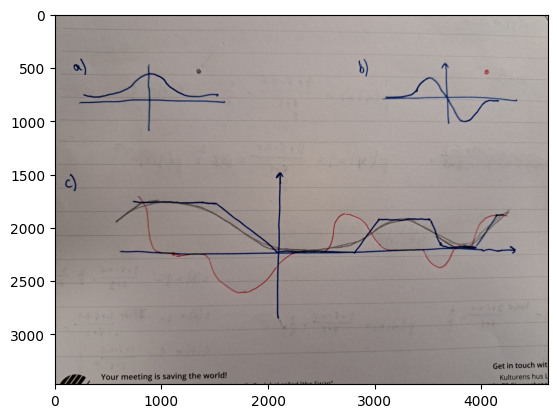

In [10]:
drawing2 = Image.open("./drawings/20231111_215416.jpg")
plt.imshow(drawing2)

e)

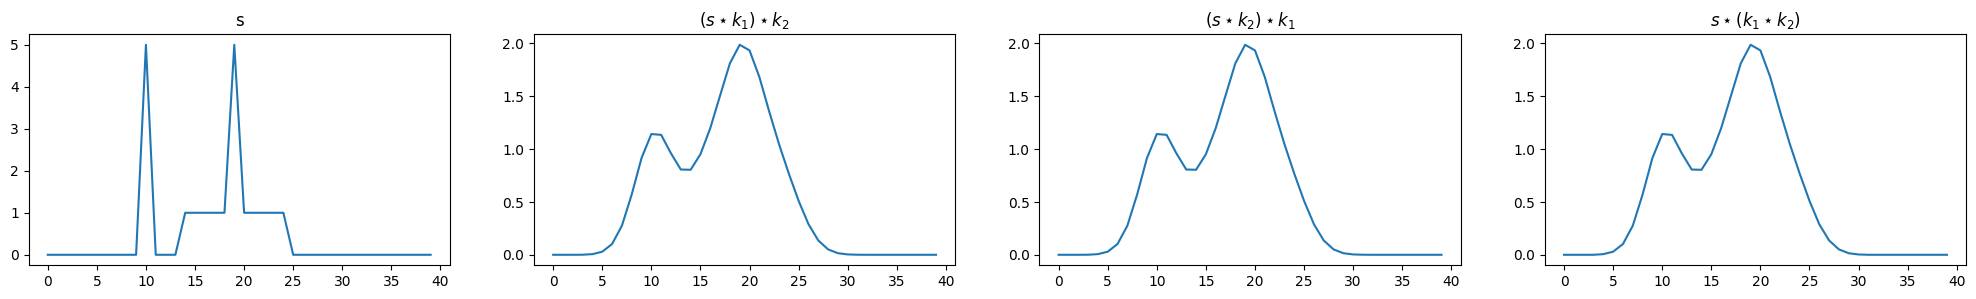

In [11]:
signal = a2_utils.read_data('signal.txt')
k1, _ = gauss(2)
k2 = np.array([0.1, 0.6, 0.4])

s_k1_k2 = simple_convolution_imp(simple_convolution_imp(signal, k1), k2)
s_k2_k1 = simple_convolution_imp(simple_convolution_imp(signal, k2), k1) # reversed ordering
s_k1_k2_with_brackets = simple_convolution_imp(signal, simple_convolution_imp(k1, k2))

fig = plt.figure(figsize=(25,3))
ax = fig.add_subplot(1,4,1, title="s")
ax.plot(signal)
ax = fig.add_subplot(1,4,2, title="$(s\star k_1)\star k_2 $")
ax.plot(s_k1_k2)
ax = fig.add_subplot(1,4,3, title="$(s\star k_2)\star k_1 $")
ax.plot(s_k2_k1)
ax = fig.add_subplot(1,4,4, title="$s\star (k_1\star k_2) $")
ax.plot(s_k1_k2_with_brackets)

# Exercise 2: Image filtering

In [12]:
def gaussfilter(I, sigma):
    k, _ = gauss(sigma)
    k = k.reshape((1, -1))  # convert k to 1xn matrix
    return cv2.filter2D(cv2.filter2D(I, -1, k), -1, k.T)

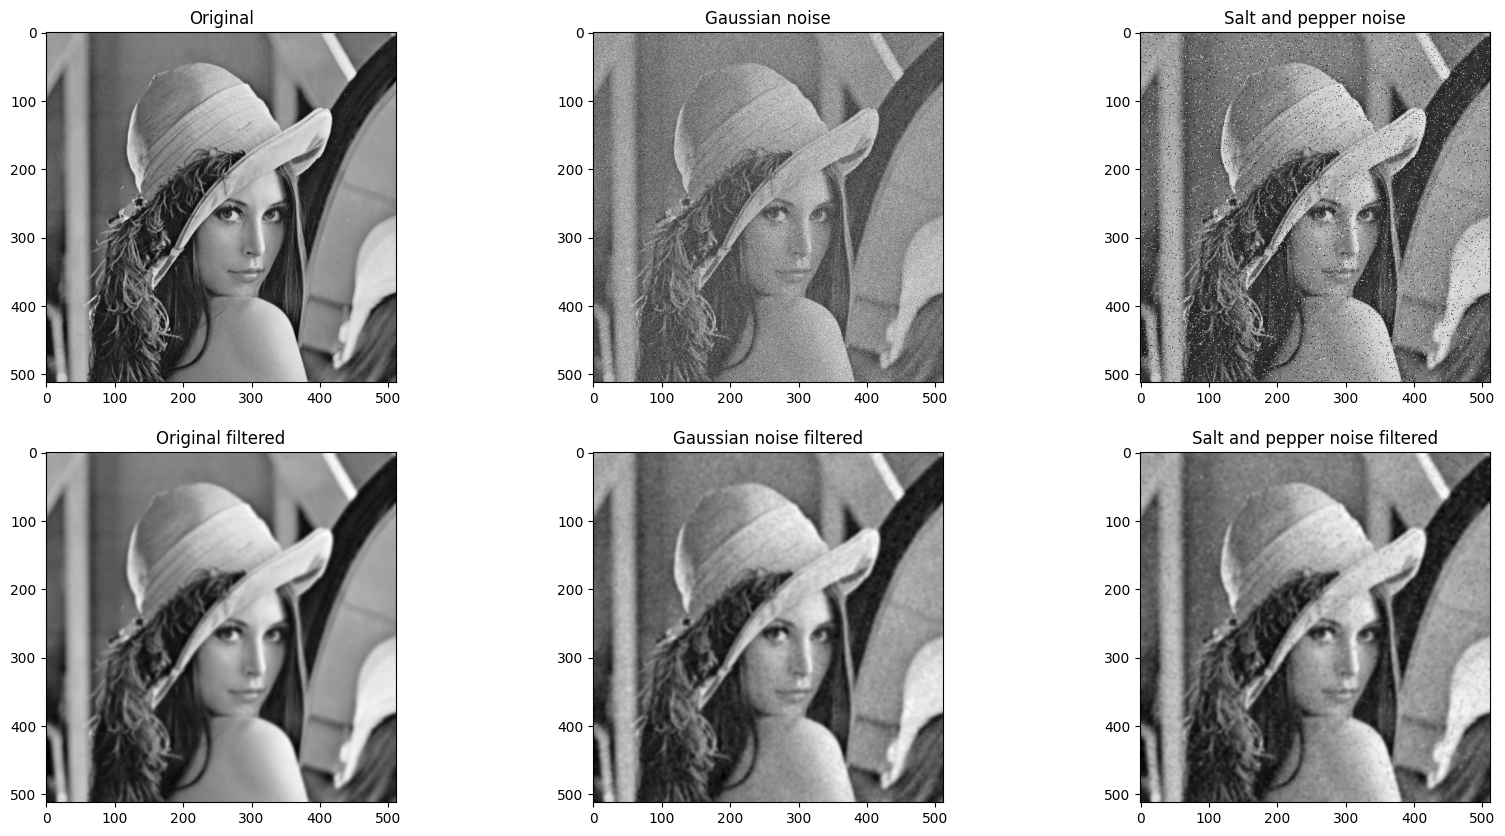

In [13]:
lena = np.asarray(Image.open("images/lena.png").convert('L')).astype(np.float64) / 255
lena_gaussed = a2_utils.gauss_noise(lena, 0.1)
lena_saltypeppered = a2_utils.sp_noise(lena, 0.05)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2, 3, 1, title="Original")
ax.imshow(lena, cmap='gray')
ax = fig.add_subplot(2, 3, 2, title="Gaussian noise")
ax.imshow(lena_gaussed, cmap='gray')
ax = fig.add_subplot(2, 3, 3, title="Salt and pepper noise")
ax.imshow(lena_saltypeppered, cmap='gray')
ax = fig.add_subplot(2, 3, 1+3, title="Original filtered")
ax.imshow(gaussfilter(lena, 2), cmap='gray')
ax = fig.add_subplot(2, 3, 2+3, title="Gaussian noise filtered")
ax.imshow(gaussfilter(lena_gaussed, 2), cmap='gray')
ax = fig.add_subplot(2, 3, 3+3, title="Salt and pepper noise filtered")
ax.imshow(gaussfilter(lena_saltypeppered, 2), cmap='gray')

A: Gaussian filter better removes Gaussian noise

b)

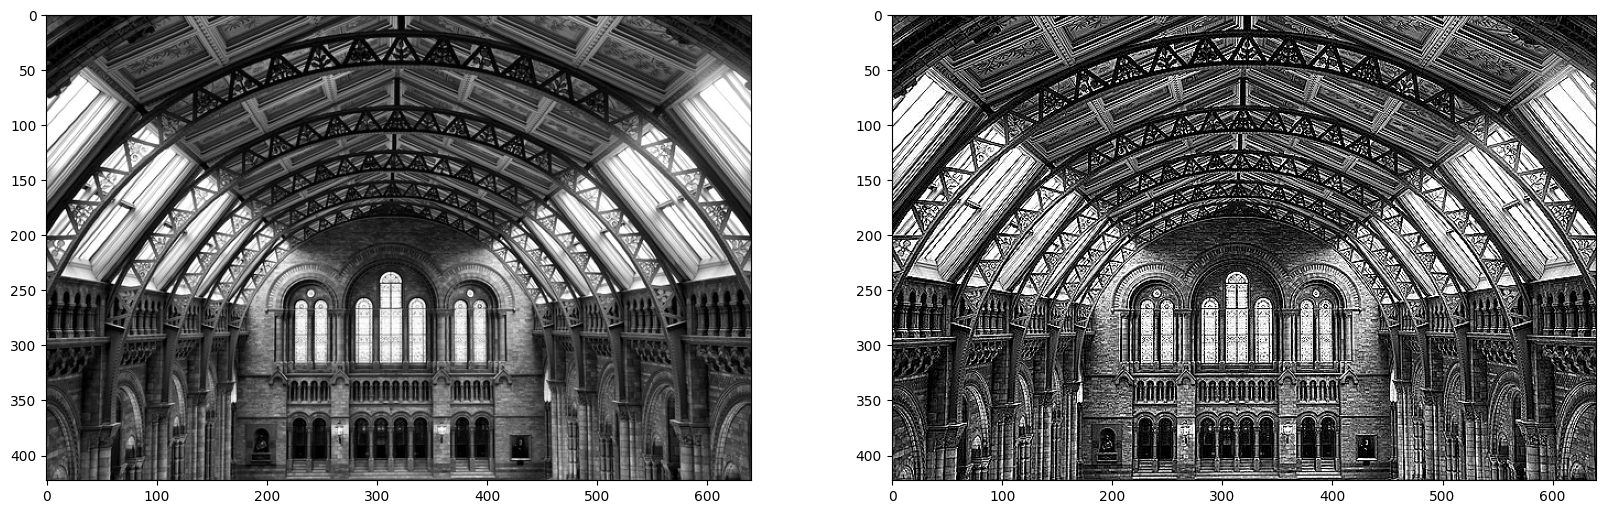

In [14]:
museum = np.asarray(Image.open("images/museum.jpg").convert('L'))

# Laplacian filter
k = np.array([
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]
])

museum_filtered = cv2.filter2D(museum, -1, k)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(museum, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(museum_filtered, cmap='gray')

c)

In [15]:
def simple_median(I, w):
    res = []
    for i in range(len(I)):
        res.append(np.median(I[max(0, i-w):min(i+w+1, len(I))]))

    return np.array(res)

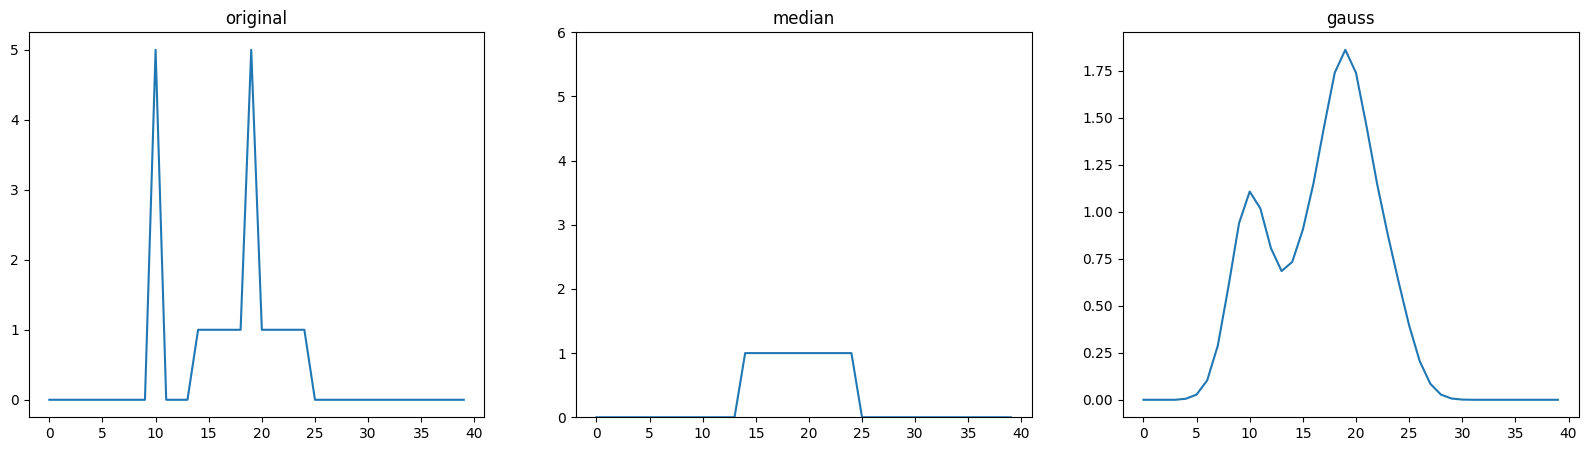

In [16]:
signal = a2_utils.read_data('signal.txt')
signal_median = simple_median(signal, 2)
k, _ = gauss(2)
signal_gaussian = simple_convolution_imp(signal, k)

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.title('original')
plt.plot(signal)
plt.subplot(1,3,2)
plt.ylim([0, 6])
plt.title('median')
plt.plot(signal_median)
plt.subplot(1,3,3)
plt.title('gauss')
plt.plot(signal_gaussian)

A: For this specific data, median filter preforms better, however in case of normally distributed error, Gaussian would be a better option. Mean filter is not commutative (counter eg: 51%-49% distribution filter of size 3 and 100)

d)

In [17]:
def simple_median_2d(I, w):
	wi, hi = I.shape
	res = np.zeros((hi, wi))
	for y in range(hi):
		for x in range(wi):
			res[y, x] = np.median(I[max(0, y-w):min(y+w+1, hi), max(0, x-w):min(x+w+1, wi)])
	return res


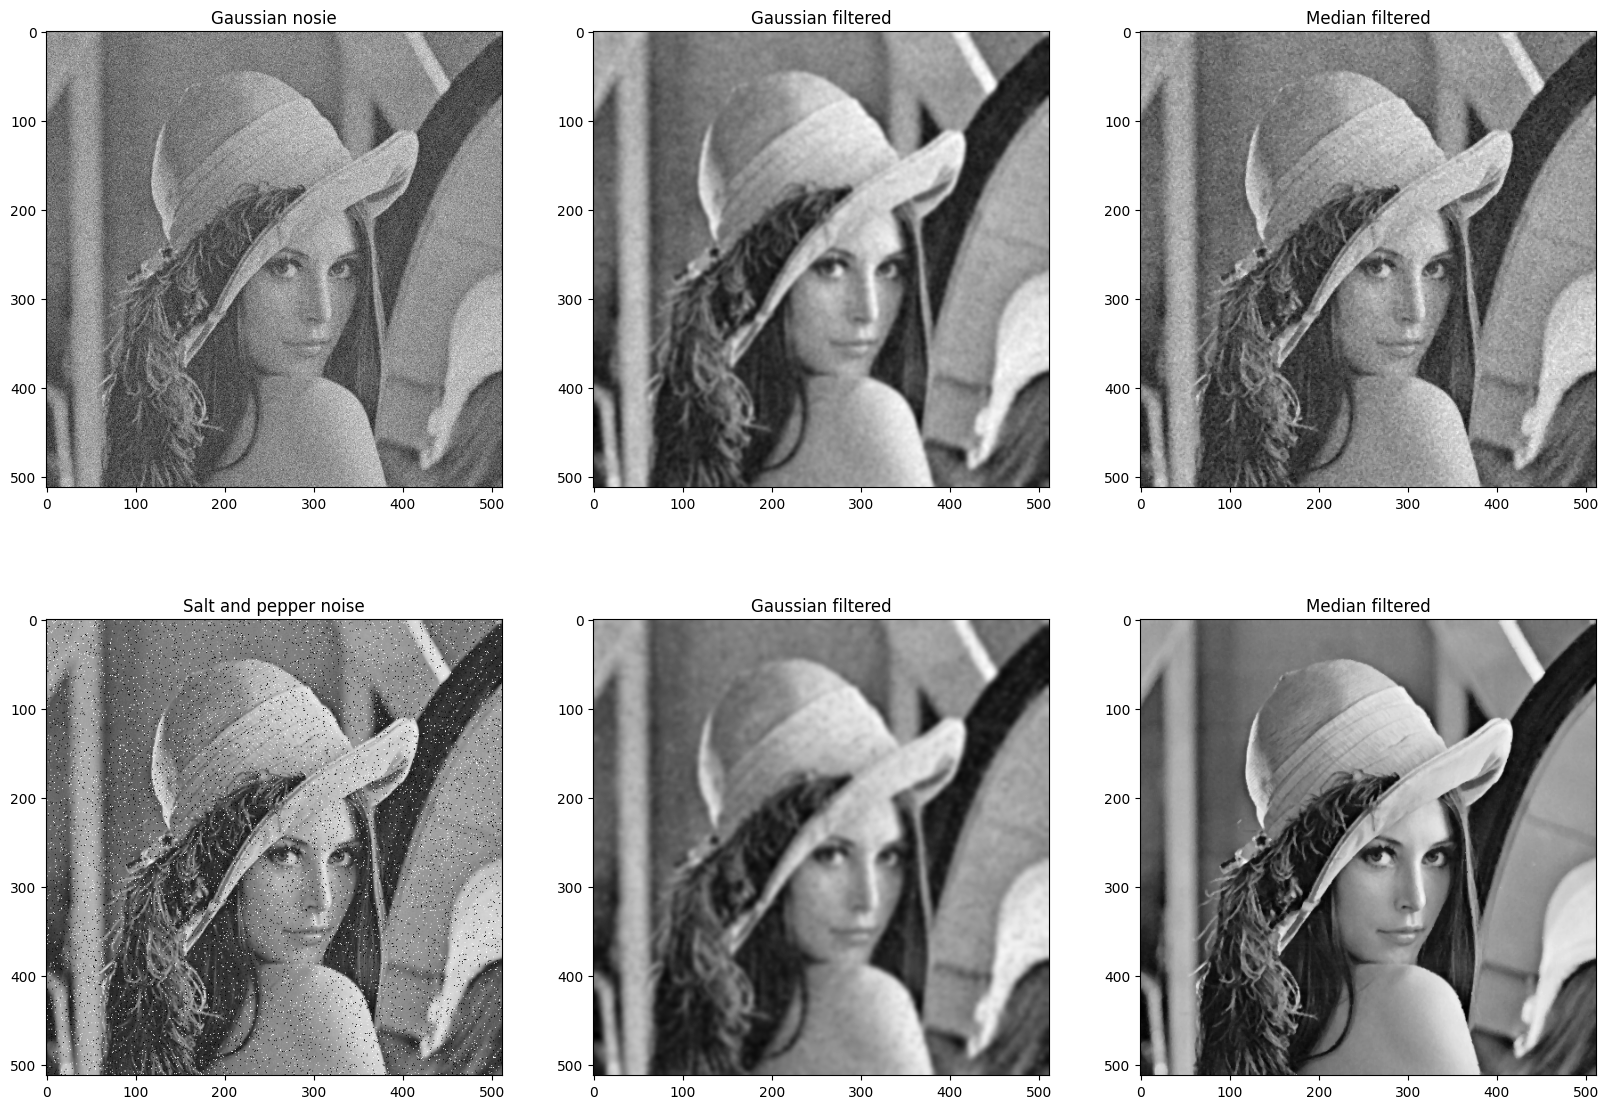

In [18]:
lena = np.asarray(Image.open("images/lena.png").convert('L')).astype(np.float64) / 255

lena_gaussed = a2_utils.gauss_noise(lena, 0.1)
lena_saltypeppered = a2_utils.sp_noise(lena, 0.05)

plt.figure(figsize=(20, 14))
plt.subplot(2, 3, 1, title="Gaussian nosie")
plt.imshow(lena_gaussed, cmap='gray')
plt.subplot(2, 3, 2, title="Gaussian filtered")	
plt.imshow(gaussfilter(lena_gaussed, 2), cmap='gray')
plt.subplot(2, 3, 3, title="Median filtered")
plt.imshow(simple_median_2d(lena_gaussed, 1), cmap='gray')

plt.subplot(2, 3, 4, title="Salt and pepper noise")
plt.imshow(lena_saltypeppered, cmap='gray')
plt.subplot(2, 3, 5, title="Gaussian filtered")
plt.imshow(gaussfilter(gaussfilter(lena_saltypeppered, 2), 2), cmap='gray')
plt.subplot(2, 3, 6, title="Median filtered")
plt.imshow(simple_median_2d(lena_saltypeppered, 1), cmap='gray')

A: Gaussian filter: O(w*n^2), Median filter O(n^2*w^2logw^2)

e)

In [19]:
def sized_gauss(sigma, size):
    x = np.linspace(-3*sigma-.5, 3*sigma+.5, size)
    g = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x**2)/(2*sigma**2))
    g /= g.sum()
    return g, x

# negative values everywhere exept the middle - detects edges
def laplacian(sigma, size):
    l = np.zeros(size)
    l[size//2] = 1
    g, x = sized_gauss(sigma, size)
    g /= g.sum()
    l = l-g
    return l, x

In [20]:
sigma = 15
laplacian_kernel, _ = laplacian(sigma, math.ceil(3*sigma)*2+1)
gaussian_kernel, _ = sized_gauss(sigma, math.ceil(3*sigma)*2+1)
laplacian_kernel = laplacian_kernel.reshape(1, -1)    # convert to matrix
gaussian_kernel = gaussian_kernel.reshape(1, -1)      # convert to matrix

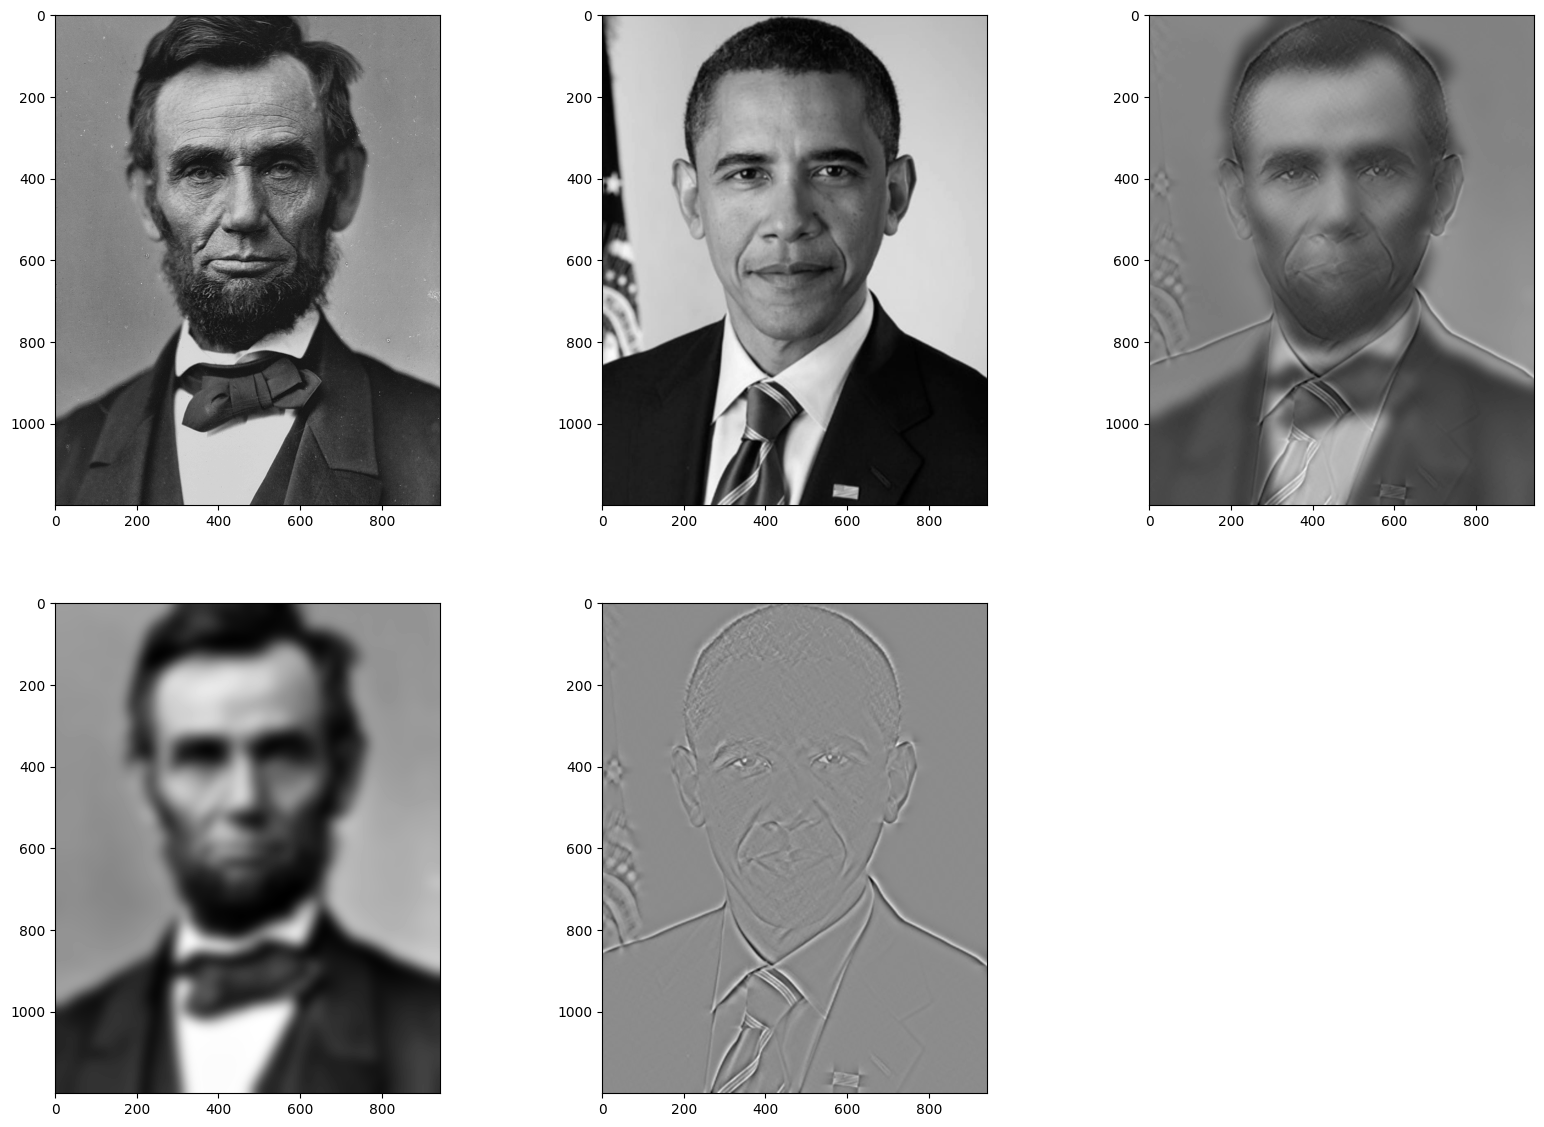

In [39]:
obama = np.asarray(Image.open("images/obama.jpg").convert('L')).astype(np.float64) / 255
lincoln = np.asarray(Image.open("images/lincoln.jpg").convert('L')).astype(np.float64) / 255

obama_laplace = cv2.filter2D(cv2.filter2D(obama, -1, laplacian_kernel), -1, laplacian_kernel.T)
lincoln_gauss = cv2.filter2D(cv2.filter2D(lincoln, -1, gaussian_kernel), -1, gaussian_kernel.T)

alpha = 0.5
combination = alpha * obama_laplace + (1 - alpha) * lincoln_gauss

fig = plt.figure(figsize=(20, 14))
plt.subplot(2, 3, 1)
plt.imshow(lincoln, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(obama, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(combination, cmap='gray')


plt.subplot(2, 3, 4)
plt.imshow(lincoln_gauss, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(obama_laplace, cmap='gray')

# Exercise 3: Global approach to image description

a)

In [22]:
def myhist3(image, bins):
    H = np.zeros((bins, bins, bins))
    eps = 1e-10 # in case of full color channel eg r,g,b=1,1,1
    for r, g, b in image.reshape(-1, 3):
        H[int(r*bins-eps), int(g*bins-eps), int(b*bins-eps)] += 1
    return H / H.sum()

b)

In [23]:
def compare_histograms(H1, H2, distance="L2"):
	h1, h2 = H1.flatten(), H2.flatten()
	if distance == "L2":
		return np.sqrt(np.sum((h1 - h2) ** 2))
	if distance == "chi":
		return np.sum(((h1 - h2) ** 2)/(h1 + h2 + 1e-10))/2
	if distance == "I":
		return 1-np.sum(np.minimum(h1, h2))
	if distance == "H":
		return np.sqrt(np.sum((np.sqrt(h1) - np.sqrt(h2))**2)/2)

c)

H1-H2
	L2: 0.42630332471992644
	chi: 0.4321906396902619
	I: 0.6007080078125
	H: 0.5745452717010867
H1-H3
	L2: 0.09507866927455817
	chi: 0.13073834412304272
	I: 0.197021484375
	H: 0.32069985954328856


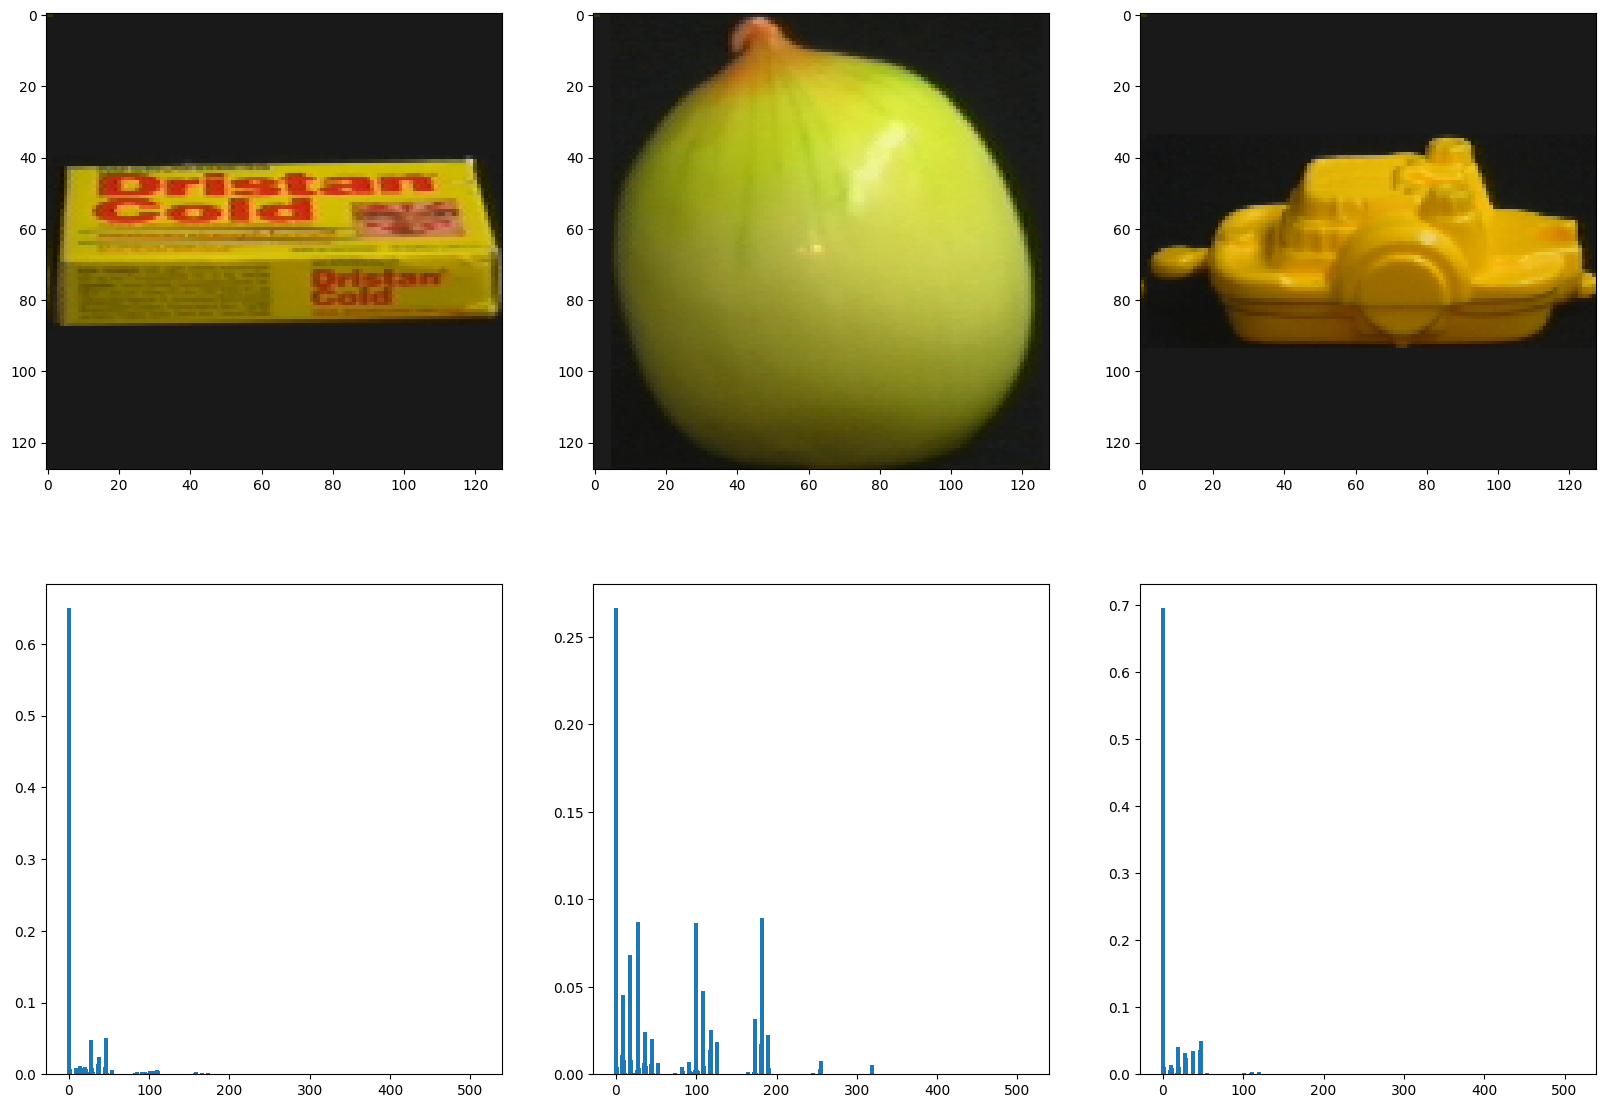

In [24]:
I1 = np.asarray(Image.open("dataset/object_01_1.png").convert('RGB')).astype(np.float64) / 255
I2 = np.asarray(Image.open("dataset/object_02_1.png").convert('RGB')).astype(np.float64) / 255
I3 = np.asarray(Image.open("dataset/object_03_1.png").convert('RGB')).astype(np.float64) / 255

H1 = myhist3(I1, 8)
H2 = myhist3(I2, 8)
H3 = myhist3(I3, 8)


plt.figure(figsize=(20, 14))
plt.subplot(2, 3, 1)
plt.imshow(I1, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(I2, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(I3, cmap='gray')
plt.subplot(2, 3, 4)

plt.bar(range(len(H1)**3), H1.transpose().flatten(), width=5)
plt.subplot(2, 3, 5)
plt.bar(range(len(H2)**3), H2.transpose().flatten(), width=5)
plt.subplot(2, 3, 6)
plt.bar(range(len(H3)**3), H3.transpose().flatten(), width=5)

print("H1-H2")
print("\tL2:", compare_histograms(H1, H2, distance='L2'))
print("\tchi:", compare_histograms(H1, H2, distance='chi'))
print("\tI:", compare_histograms(H1, H2, distance='I'))
print("\tH:", compare_histograms(H1, H2, distance='H'))
print("H1-H3")
print("\tL2:", compare_histograms(H1, H3, distance='L2'))
print("\tchi:", compare_histograms(H1, H3, distance='chi'))
print("\tI:", compare_histograms(H1, H3, distance='I'))
print("\tH:", compare_histograms(H1, H3, distance='H'))

A: Considering L2 distance, object 3 is more similar to object 2. Similarly for other distances. The bin with high component represent black color (0, 0, 0).

d)

In [25]:
def calculate_histograms(path, bins, H_i, distance="L2"):
    histograms = []
    for item in os.listdir(path):
        image = np.asarray(Image.open(path + item).convert('RGB')).astype(np.float64) / 255
        H = myhist3(image, bins)
        d_L2 = compare_histograms(H, H_i, distance="L2")
        d_chi = compare_histograms(H, H_i, distance="chi")
        d_hell = compare_histograms(H, H_i, distance="H")
        histograms.append((image, H, d_L2, d_chi, d_hell))
    return histograms

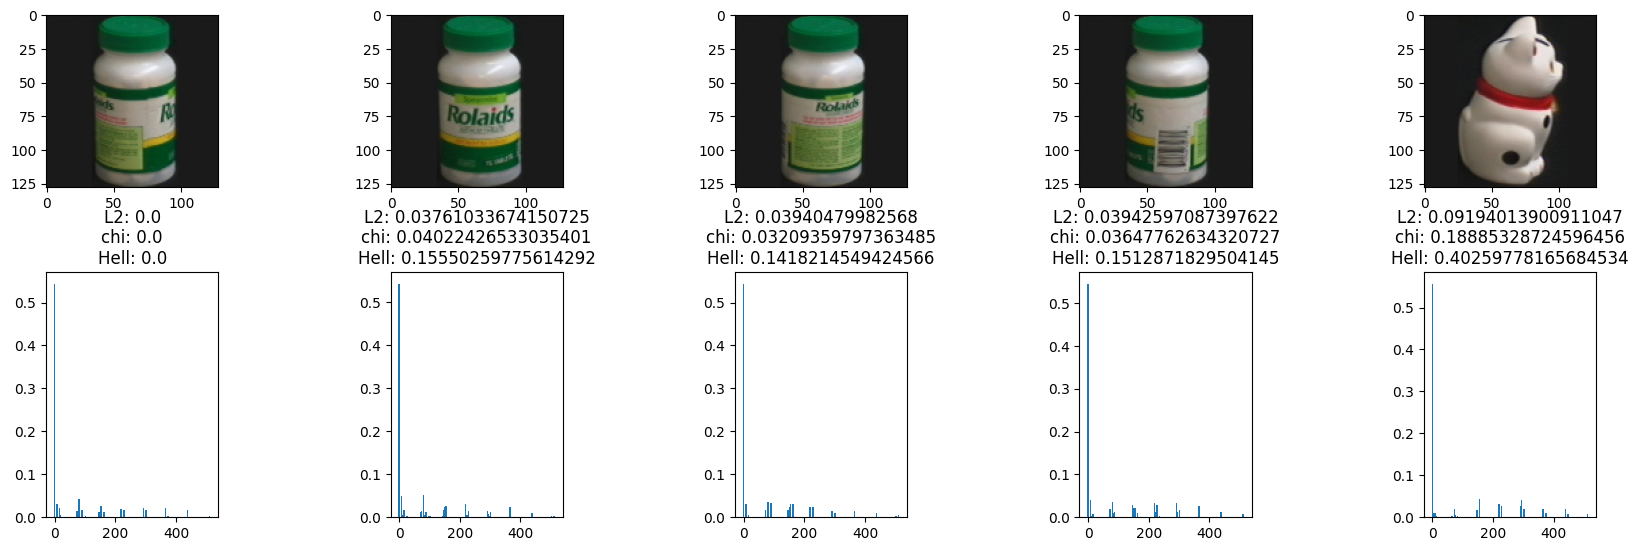

In [26]:
I = np.asarray(Image.open("dataset/object_05_4.png").convert('RGB')).astype(np.float64) / 255
H_i = myhist3(I, 8)

all_histograms = calculate_histograms("dataset/", 8, H_i, "H")
sorted_histograms = sorted(all_histograms, key = lambda hist: hist[2])

plt.figure(figsize=(20,7))
for i, (img, H, d_L2, d_chi, d_hell) in enumerate(sorted_histograms[:5]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.subplot(2, 5, 6 + i, title=f"L2: {d_L2}\nchi: {d_chi}\nHell: {d_hell}")
    plt.subplots_adjust(wspace=1.0)
    plt.bar(range(8**3), H.transpose().flatten(), width=5)

A: L2 distance works great. In my opinion Hells distance or chi distance is the most suitable because they captue the differences in shape the best. Higher number of bins provide more detailed comparrisons however it will also increase computatuon time.

e)

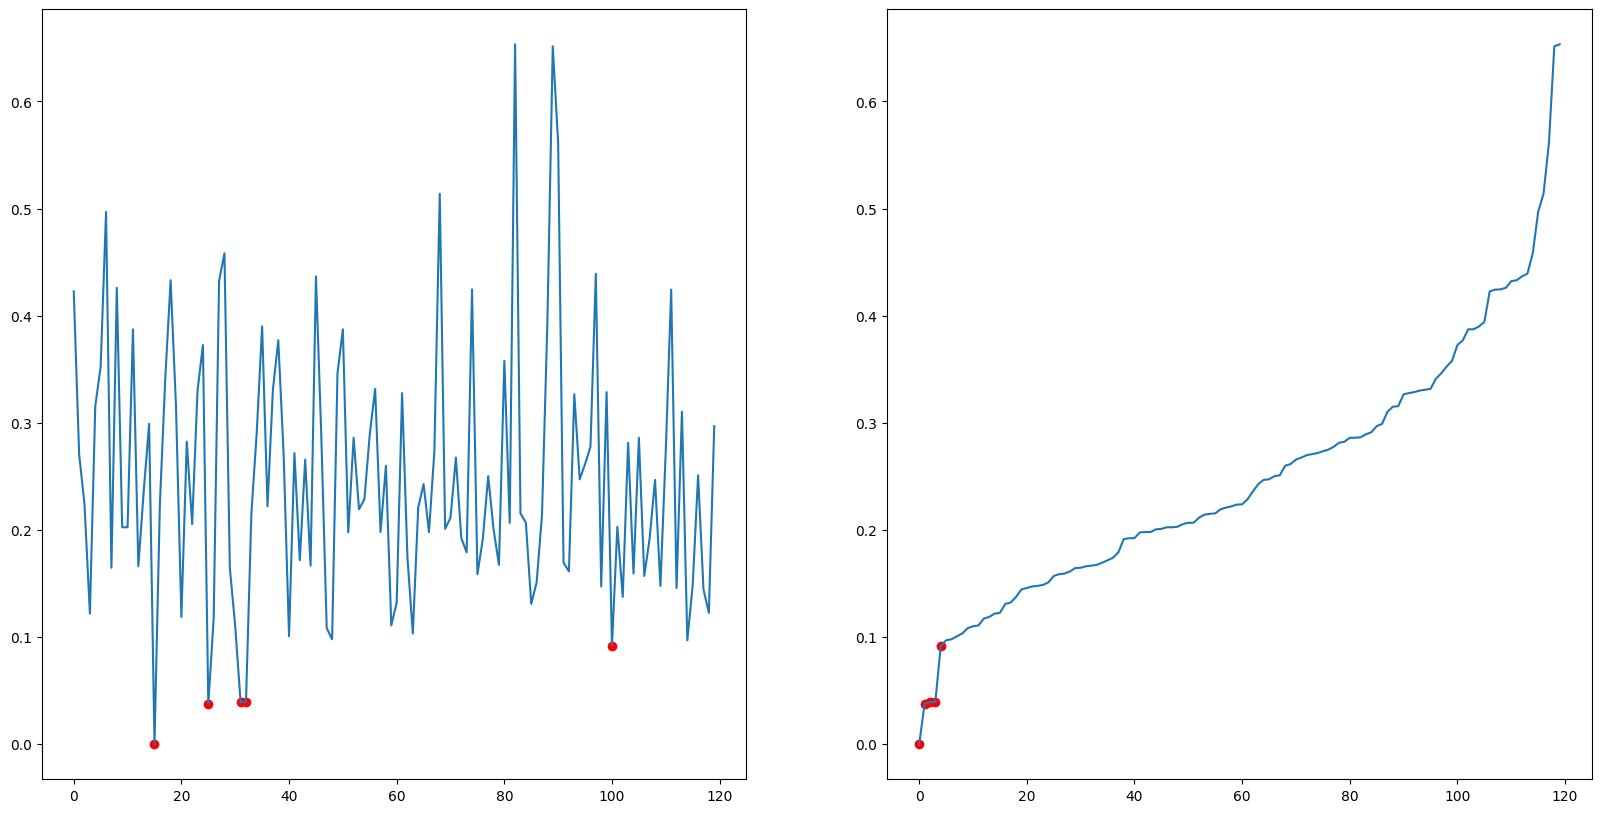

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot([h[2] for h in all_histograms])
min_distances = set([h[2] for h in sorted_histograms[:5]])
sim_x = [i for i, h in enumerate(all_histograms) if h[2] in min_distances]
sim_y = [all_histograms[i][2] for i in sim_x]
plt.scatter(sim_x, sim_y, c="red")

plt.subplot(1, 2, 2)
plt.plot([h[2] for h in sorted_histograms])
sim_x = range(5)
sim_y = [sorted_histograms[i][2] for i in sim_x]
plt.scatter(sim_x, sim_y, c="red")

f)

<BarContainer object of 512 artists>

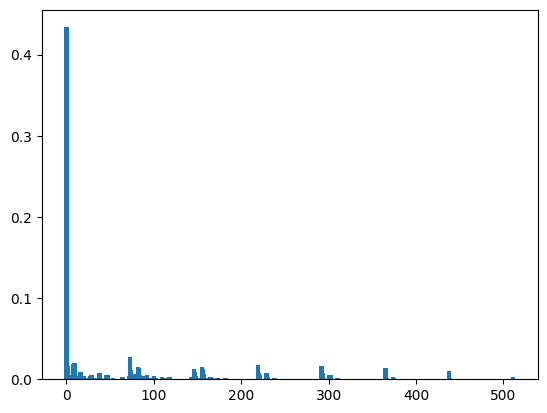

In [32]:
mean_hist = np.sum(np.array([h[1] for h in all_histograms]), axis=0) / len(all_histograms)
lam = 10
weights = np.exp(-lam*mean_hist)

plt.bar(range(8**3), mean_hist.transpose().flatten(), width=5)

A: This histogarm is stil dominated by black color.

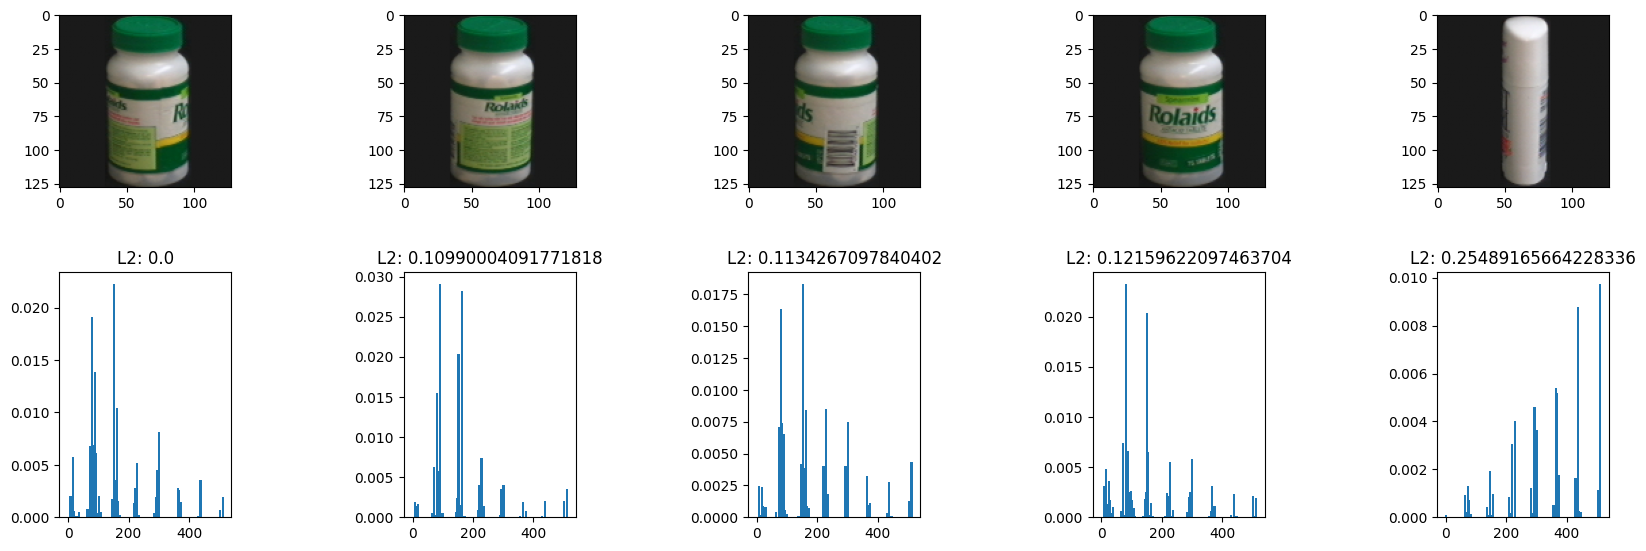

In [31]:
new_hists = [(image, H*weights, compare_histograms(H*weights, H_i*weights, distance="H")) for (image, H, _, _, _) in all_histograms]
new_sorted = sorted(new_hists, key = lambda h: h[2])

plt.figure(figsize=(20,7))
for i, (img, H, d_L2) in enumerate(new_sorted[:5]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.subplot(2, 5, 6 + i, title=f"L2: {d_L2}")
    plt.subplots_adjust(wspace=1.0)
    plt.bar(range(8**3), H.transpose().flatten(), width=7)